# PGF plot generation

In this notebook, we'll rerwite the plot generation functions using `matplotlib` so they can be exported to pgf.

In [22]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from statdepth import FunctionalDepth
from statdepth.testing import generate_noisy_univariate

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

First, we write a function that plots the N deepest curves in red and the rest in blue.

In [23]:
def plot(d, n, loc, title=None, fontsize=10):
    '''
    Sets pyplot to plot n deepest curves in red and the rest in blue.
    
    Parameters:
    d: FunctionalDepth object
    n: Number of functions to plot in red
    loc: pyplot axes
    title: plot title, if specified
    '''
    
    for c in np.array(d.get_data().drop(d.get_deep_data(n=n).columns, axis=1).T):
        loc.plot(
            d._orig_data.index,
            c,
            "#6ea8ff",
            linewidth=.2
        )
        
    for c in np.array(d.get_deep_data(n=n).T): #Plot n deepest curves
        loc.plot(
            d._orig_data.index, 
            c,
            "r",
            linewidth=.3
        )

    loc.set_title(title, fontsize=fontsize, y=0)

In [24]:
d = FunctionalDepth([generate_noisy_univariate()], relax=True, quiet=False)

100%|██████████| 20/20 [00:02<00:00,  8.16it/s]


GPOT HERE


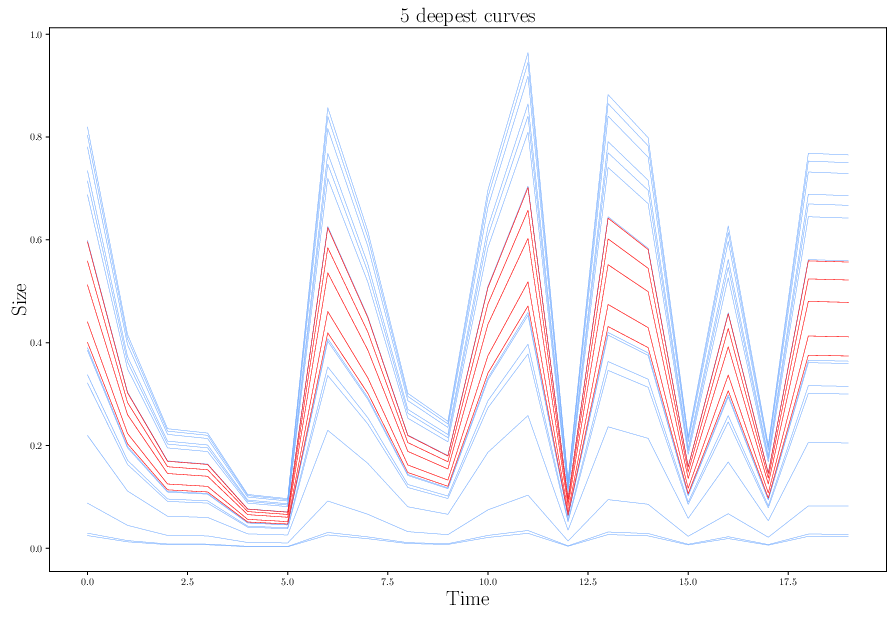

In [32]:
def n_deepest(d, n, fontsize=20, title=None, xaxis_title=None, yaxis_title=None, save=None):
    f = plt.figure()
    f.set_figheight(10)
    f.set_figwidth(15)


    for c in np.array(d.get_data().drop(d.get_deep_data(n=n).columns, axis=1).T):
        plt.plot(
            d._orig_data.index,
            c,
            "#6ea8ff",
            linewidth=.2
        )

    for c in np.array(d.get_deep_data(n=n).T): #Plot n deepest curves
        plt.plot(
            d._orig_data.index, 
            c,
            "r",
            linewidth=.3
        )

    plt.title(title, fontsize=fontsize)
    plt.xlabel(xaxis_title, fontsize=fontsize)
    plt.ylabel(yaxis_title, fontsize=fontsize)
    
    if save is not None:
        f.savefig(save)
    else:
        f.show()
    
n_deepest(d, 5, 20, '5 deepest curves', 'Time', 'Size', save='hello.pgf')